In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
from myst_nb import glue
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## Expectation by Conditioning ##

Let $T$ be a random variable, and let $S$ be a random variable defined on the same space as $T$. As we have seen, conditioning on $S$ might be a good way to find probabilities for $T$ if $S$ and $T$ are related. In this section we will see that conditioning on $S$ can also be a good way to find the expectation of $T$.

We will start with a simple example to illustrate the ideas. 

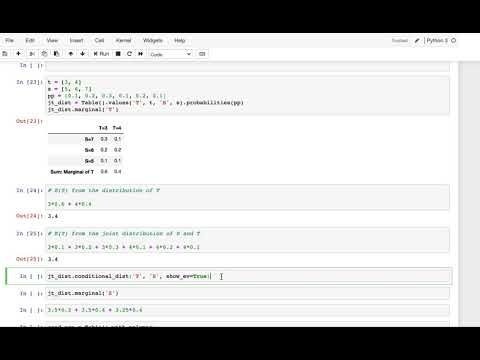

In [2]:
# VIDEO: Expectation by Conditioning
from IPython.display import YouTubeVideo

vid_exp_by_cond = YouTubeVideo('GrM0Ve-a010')
glue("vid_exp_by_cond", vid_exp_by_cond)

```{dropdown} See More
:icon: video
{glue:}`vid_exp_by_cond`
```

Let the joint distribution of $T$ and $S$ be as in the table below.

In [3]:
t = [3, 4]
s = [5, 6, 7]
pp = [0.1, 0.2, 0.3, 0.1, 0.2, 0.1]
jt_dist = Table().values('T', t, 'S', s).probabilities(pp)
jt_dist

,T=3,T=4
S=7,0.3,0.1
S=6,0.2,0.2
S=5,0.1,0.1


How can $S$ be involved in the calculation of $E(T)$? 

Notice that to find $E(T)$, you could use the joint distribution table and the definition of expectation as follows:

In [4]:
3*(0.3 + 0.2 + 0.1) + 4*(0.1 + 0.2 + 0.1) 

3.4

This is equivalent to going to each cell of the table, weighting the value of $T$ in that cell with the probability in the cell, and then adding. Here's another way of looking at this.

Let's condition on $S$:

In [5]:
jt_dist.conditional_dist('T', 'S')

,T=3,T=4,Sum
Dist. of T | S=7,0.75,0.25,1.0
Dist. of T | S=6,0.50,0.50,1.0
Dist. of T | S=5,0.50,0.50,1.0
Marginal of T,0.60,0.40,1.0


Each of the three conditional distributions is a distribution in its own right. Therefore its histogram has a balance point, just as the marginal distribution of $T$ does.

In [6]:
jt_dist.conditional_dist('T', 'S', show_ev=True)

,T=3,T=4,Sum,EV
Dist. of T | S=7,0.75,0.25,1.0,3.25
Dist. of T | S=6,0.50,0.50,1.0,3.50
Dist. of T | S=5,0.50,0.50,1.0,3.50
Marginal of T,0.60,0.40,1.0,3.40


You can see $E(T) = 3.4$ in the row corresponding to the distribution of $T$. And you can also see the *conditional expectation of $T$* given each possible value of $S$:
- $~E(T \mid S=5) = 3.5$
- $~E(T \mid S=6) = 3.5$
- $~E(T \mid S=7) = 3.25$

This defines a *function of $S$*: for each value $s$ of $S$, the function returns $E(T \mid S=s)$.

In [7]:
ev_T_given_S = Table().with_columns(
    's', s,
    'E(T | S = s)', [3.5, 3.5, 3.25],
    'P(S = s)', [0.2, 0.4, 0.4]
)
ev_T_given_S

s,E(T | S = s),P(S = s)
5,3.5,0.2
6,3.5,0.4
7,3.25,0.4


This function of $S$ is called the *conditional expectation of $T$ given $S$* and is denoted $E(T \mid S)$. Unlike expectation which is a number, conditional expectation is a random variable.

As it's a random variable, it has an expectation, which we can calculate using the non-linear function rule. The answer is a quantity that you will recognize.

In [8]:
ev = sum(ev_T_given_S.column('E(T | S = s)')*ev_T_given_S.column('P(S = s)'))
ev

3.4000000000000004

That's right: it's the expectation of $T$.

What we have learned from this is that $E(T)$ is the *average of the conditional expectations of $T$ given the different values of $S$, weighted by the probabilities of those values*. 

In short, $E(T)$ is the *expectation of the conditional expectation of $T$ given $S$*.

### Conditional Expectation as a Random Variable ###
In general, suppose $T$ and $S$ are two random variables on a probability space.

Then for each fixed value of $s$, $T$ has a conditional distribution given $S=s$. This is an ordinary distribution and has an expectation. That is called the *conditional expectation of  $T$ given $S=s$* and is denoted $E(T \mid S = s)$. 

So for each $s$, there is a value $E(T \mid S=s)$. This defines a function of the random variable $S$. It is called the *conditional expectation of $T$ given $S$*, and is denoted $E(T \mid S)$.

The key difference between expectation and conditional expectation:

- $E(T)$, the expectation of $T$, is a real number.
- $E(T \mid S)$, the conditional expectation of $T$ given $S$, is a function of $S$ and hence is a random variable.

```{admonition} Quick Check
A class has three sections. 
<UL>
<LI>Section 1 has 20 students with a midterm average of 75.
<LI>Section 2 has 35 students with a midterm average of 70.
<LI>Section 3 has 25 students with a midterm average of 85.

A student is picked at random from the class. Let $S$ be the student's section number. For example, $\{ S=1 \}$ is the event that the student is in Section 1. Let $T$ be the student's midterm score. Draw a distribution table for $E(T \mid S)$.

```

```{admonition} Answer
:class: dropdown
The possible values of $S$ are $s=1, 2, 3$. The corresponding possible values and probabilities of $E(T \mid S)$ are

|$E(T \mid S=s)$|$75$|$70$|$85$|
|---:|:---:|:---:|:---:|
|$P(S=s)$|$\frac{20}{80}$|$\frac{35}{80}$|$\frac{25}{80}$|

```

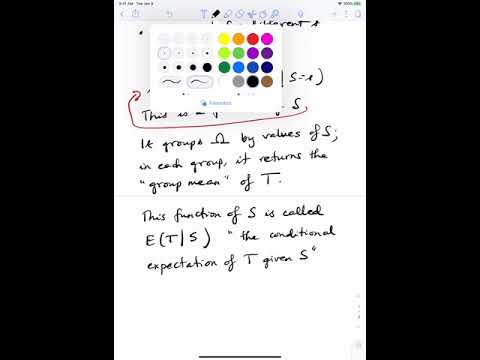

In [9]:
# VIDEO: Conditional Expectation
vid_cond_exp = YouTubeVideo('k0CaLXwRCz0')
glue("vid_cond_exp", vid_cond_exp)

```{dropdown} See More
:icon: video
{glue:}`vid_cond_exp`
```

Since $E(T \mid S)$ is a random variable, it has an expectation. That expectation is equal to $E(T)$. We observed this in an example; now here is a proof.

### Iterated Expectations ###
Suppose we want the expectation of a random variable, and suppose it is easy for us to say what that expectation would be if we were given the value of a related random variable. The rule of *iterated expectations* says that we can find that conditional expectation first, and take its expectation to get our answer.

Formally, let $S$ and $T$ be two random variables on the same space. Then $E(T) = E(E(T \mid S))$.

Proof:

$$
\begin{align*}
E(T) &= \sum_{\text{all }t} tP(T=t) \\ \\
&= \sum_{\text{all }t} t \sum_{\text{all }s} P(S=s, T=t) \\ \\
&= \sum_{\text{all }t} t \sum_{\text{all }s} P(S=s)P(T=t \mid S=s) \\ \\
&= \sum_{\text{all }s} \Big{(} \sum_{\text{all }t} tP(T=t \mid S=s) \Big{)} P(S=s) \\ \\
&= \sum_{\text{all }s} E(T \mid S=s)P(S=s) \\ \\
&= E(E(T \mid S))
\end{align*}
$$

```{admonition} Quick Check
A bag has three fair coins, five coins that land heads with chance $1/4$, and two coins that land heads with chance $2/3$. A coin is picked at random and tossed 10 times. Find the expected number of heads.

```

```{admonition} Answer
:class: dropdown
$(10\cdot\frac{1}{2})0.3 + (10\cdot\frac{1}{4})0.5 + (10\cdot\frac{2}{3})0.2$

```

### Example: Random Sums ###
Let $X_1, X_2, \ldots$ be i.i.d. and let $E(X_1) = \mu_X$. Let $N$ be a non-negative integer valued random variable that is independent of the sequence of $X$'s and let $E(N) = \mu_N$. 

Define the *random sum* $S$ to be

$$
S = X_1 + X_2 + \ldots + X_N
$$

where $S = 0$ if $N=0$.

Notice that $S$ is the sum of a random number of terms.

**Question:** What is $E(S)$?

**Answer:** If $N$ were the constant 10, then the answer would be $10\mu_X$. This is our signal to condition on $N$. Here are the steps to follow.
- First condition on a fixed value of $N$. Given $N=n$, $S$ is the sum of $n$ i.i.d. terms. Hence 

$$
E(S \mid N=n) = n\mu_X
$$ 

This is an equality of real numbers. Note that it is true for all $n$, including 0.
- Next write the conditional expectation in random variable notation.

$$
E(S \mid N) = N\mu_X
$$

This is an equality of random variables.
- Now use iterated expectations.

$$
E(S) = E(E(S \mid N)) = E(N\mu_X) = E(N)\mu_X = \mu_N\mu_X
$$

This is a natural answer. It is the expected number of terms being added times the expected size of each of those terms.

This is an important point to note about calculating expectations by conditioning. The natural answer is often correct.

### Example: Population Size in a Branching Process ###
In a *Galton-Watson branching process*, each individual has a random number of progeny. Assume that the numbers of progeny of the different indviduals are i.i.d. with mean $\mu$. Suppose the process starts with one individual in Generation 0. 

**Question:** Assuming that there are no deaths, what is the expected total number of individuals in Generations 0 through $n$?

**Answer:** Let $T_k$ be the number of individuals born in Generation $k$. We are assuming $T_0 = 1$. By the example above, for each $k > 1$,

$$
E(T_k) = E(T_{k-1})\mu
$$

So by induction, for each $k > 1$ the expected number of people in Generation $k$ is

$$
E(T_k) = \mu^k
$$

Indeed, the result is true for $k=0$ as well. So the expected total number of people through Generation $n$ is

$$
\begin{equation}
\sum_{k=0}^n \mu^k = 
 \begin{cases} 
      n & \text{if } \mu = 1 \\
      \frac{1 - \mu^{n+1}}{1 - \mu} = \frac{\mu^{n+1} - 1}{\mu - 1} & \text{if } \mu \ne 1
   \end{cases}
\end{equation}
$$
 
The value of $\mu$, the expected number of progeny of a single individual, determines how this expected total behaves as $n$ gets large. Even with no deaths, if $\mu < 1$ the expected population size tends to a positive constant as $n \to \infty$. But if $\mu \ge 1$ then the expected population size explodes.

This is closely related to the $R_0$ value you might have read about in the context of the Covid-19 pandemic. $R_0$ is notation for the average number of people infected by a single individual, and is the equivalent of $\mu$ in our example. The assumptions of the Covid-19 models are more complex than ours, but the conclusion is the same: for the epidemic to be under control, $R_0$ has to be below 1.

### Other Properties of Conditional Expectation ###
The most important property of conditional expectation is the iteration that we have studied in this section. But conditional expectation has other properties that are analogous to those of expectation. **They are now expressed as equalities of random variables instead of equalities of real numbers.**

Go through the list and notice that all the moves you'd naturally want to make are justified. The proofs are routine; we won't go through them.
- **Additivity.** $~E(T+U \mid S) = E(T \mid S) + E(U \mid S)$
- **Linear Transformation.** $~E(aT+b \mid S) = aE(T \mid S) + b$

Two more properties formalize the idea that the variable that is given can be treated as a constant in conditional expectations.
- **"Constant"**: Let $g$ be a function. Then $E(g(S) \mid S) = g(S)$.
- **"Pulling out a Constant"**: $~E(g(S)T \mid S) = g(S)E(T \mid S)$.

For example,

$$
E(3ST + \log(S)U + 7 \mid S) = 3SE(T \mid S) + \log(S)E(U \mid S) + 7
$$

though we sincerely hope you won't encounter a random variable as bizarre as this.